- tips 데이터
    - 요일별 팁의 비율(bar)
    - 인원수별 팁의 비율(bar)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [21]:
tips['tip_pct'] = (tips.tip/ tips.total_bill * 100).round(2)
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82
243,18.78,3.00,Female,No,Thur,Dinner,2,15.97


In [22]:
# 요일별 bar차트 그리기
date=tips.pivot_table('tip_pct','day')
date


,tip_pct
day,
Thur,16.126452
Fri,16.991579
Sat,15.314598
Sun,16.689605


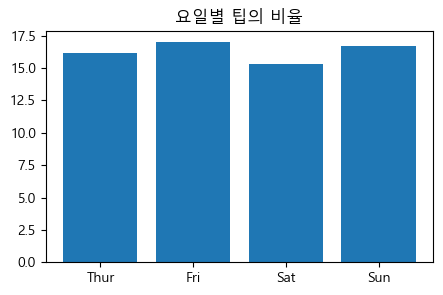

In [23]:
plt.figure(figsize=(5,3))
plt.bar(date.index,date.tip_pct)
plt.title('요일별 팁의 비율')
plt.show()

In [24]:
# 인원수 bar차트 그리기
person=tips.pivot_table('tip_pct','size')
person

,tip_pct
size,
1,21.727500
2,16.571410
3,15.214737
4,14.594865
5,14.152000
6,15.620000


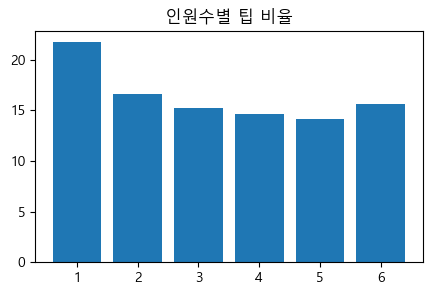

In [25]:
plt.figure(figsize=(5,3))
plt.bar(person.index, person.tip_pct)
plt.title('인원수별 팁 비율')
plt.show()

Anscombe 데이터

In [26]:
ans = sns.load_dataset('anscombe')
ans.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


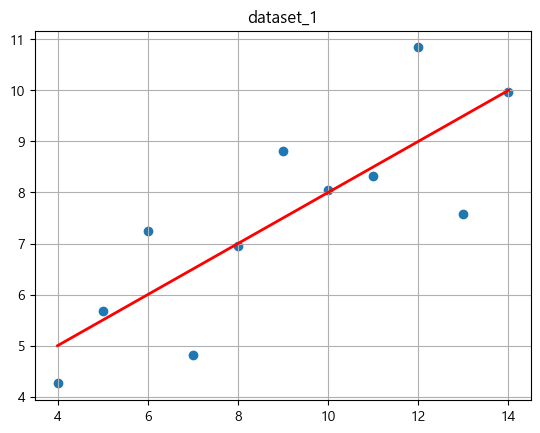

In [27]:
dataset_1 = ans[ans['dataset'] == 'I']
plt.scatter(dataset_1['x'], dataset_1['y'],marker='o')
plt.plot([4,14],[5,10],'r-',lw=2)       # y = 0.5 * x +3
plt.title('dataset_1')
plt.grid()
plt.show()

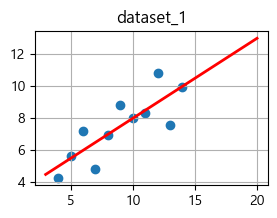

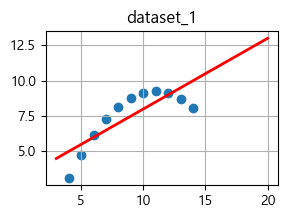

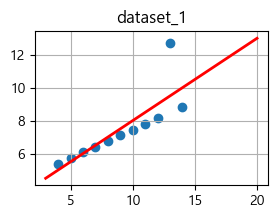

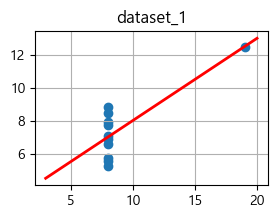

In [28]:
for roman in ['I','II','III','IV']:
    ds = ans[ans.dataset == roman]
    plt.figure(figsize=(3,2))
    plt.scatter(ds['x'], ds['y'],marker='o')
    plt.plot([3,20],[4.5,13],'r-',lw=2)       # y = 0.5 * x +3
    plt.title('dataset_1')
    plt.grid()
    plt.show()

- cctv 데이터

In [34]:
pail='../02.Pandas/과제/data/서울시 자치구 년도별 CCTV 설치 현황_221231기준 copy.csv'
columns = '구분,총계'.split(',')
cctv = pd.read_csv(pail, encoding='euc=kr', thousands=',')
cctv = cctv[columns]
cctv.head()

,구분,총계
0,계,91341
1,종로구,1980
2,중 구,2584
3,용산구,2847
4,성동구,4047


In [35]:
cctv.drop([0],inplace=True)
cctv.set_index('구분',inplace=True)
cctv.head()

,총계
구분,
종로구,1980
중 구,2584
용산구,2847
성동구,4047
광진구,3480


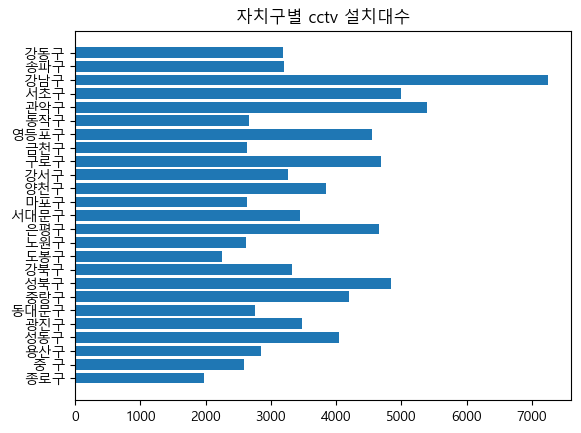

In [36]:
# unsorted
plt.barh(cctv.index,cctv.총계)
plt.title('자치구별 cctv 설치대수')
plt.show()

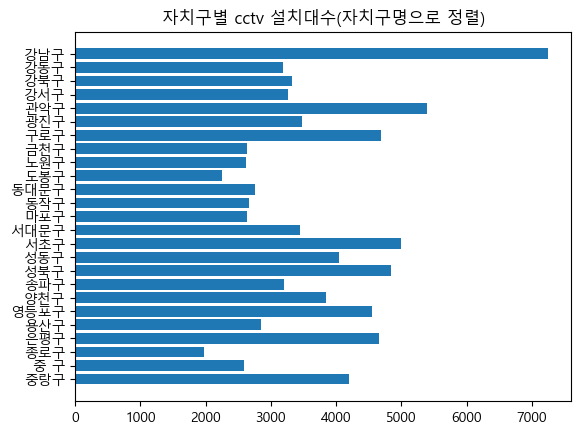

구분
중랑구    4193
중 구    2584
종로구    1980
은평구    4653
용산구    2847
Name: 총계, dtype: int64

In [37]:
# 2. index 로 정렬
si= cctv.총계.sort_index(ascending=False)
plt.barh(si.index, si.values)
plt.title('자치구별 cctv 설치대수(자치구명으로 정렬)')
plt.show()
si.head()


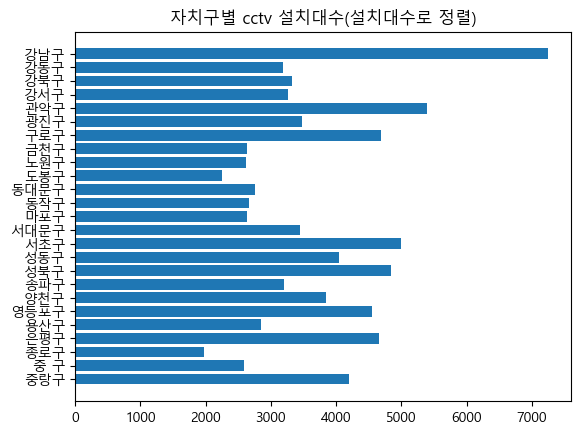

구분
중랑구    4193
중 구    2584
종로구    1980
은평구    4653
용산구    2847
Name: 총계, dtype: int64

In [38]:
# 3.설치대수로 정렬
sv= cctv.총계.sort_values()
plt.barh(si.index, si.values)
plt.title('자치구별 cctv 설치대수(설치대수로 정렬)')
plt.show()
si.head()